In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,mean_squared_error,r2_score,precision_score,recall_score,f1_score

In [82]:
df=pd.read_csv("cleaned_data.csv")

Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
k-NN - Mean Squared Error: 6072592628.135993
k-NN - R² Score: 0.19338386886114856


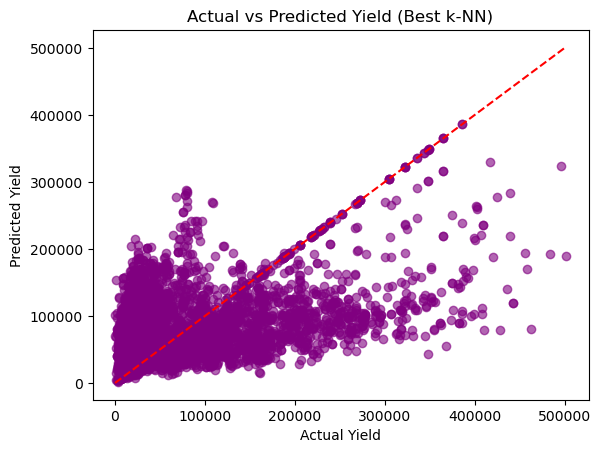

In [83]:
X = df.drop(columns=["hg/ha_yield","Area","Item"])
y = df["hg/ha_yield"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 21],  
    'weights': ['uniform', 'distance']         
}

knn = KNeighborsRegressor()

grid = GridSearchCV(knn, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

best_knn = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

y_pred_knn = best_knn.predict(X_test)


mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("k-NN - Mean Squared Error:", mse_knn)
print("k-NN - R² Score:", r2_knn)

plt.scatter(y_test, y_pred_knn, color="purple", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield (Best k-NN)")
plt.show()

Mean Squared Error: 125339791.22696194
R² Score: 0.9833512465484983


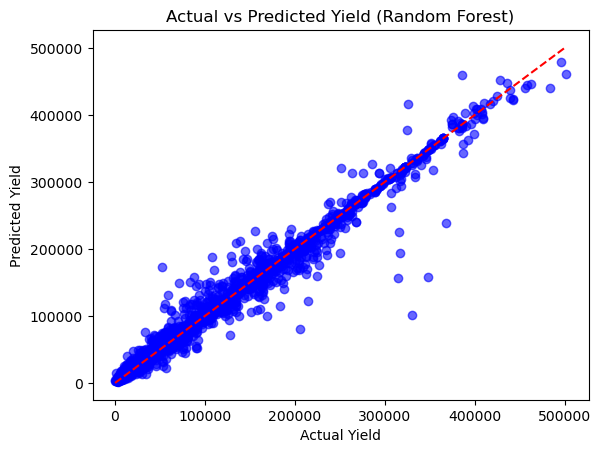

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(
    n_estimators=200,   
    max_depth=None,     
    random_state=42,
    n_jobs=-1          
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield (Random Forest)")
plt.show()

In [85]:
X = df.drop(columns=["hg/ha_yield","Area","Item"])
y = df["hg/ha_yield"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


gb_model = GradientBoostingRegressor(
    n_estimators=200,   
    learning_rate=0.1,  
    max_depth=3,         
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Performance:")
print("RMSE:", rmse)
print("R²:", r2)

Gradient Boosting Performance:
RMSE: 31766.96027136278
R²: 0.8659570198803832


Decision Tree - Mean Squared Error: 2224313877.3998785
Decision Tree - R² Score: 0.7045467127312516


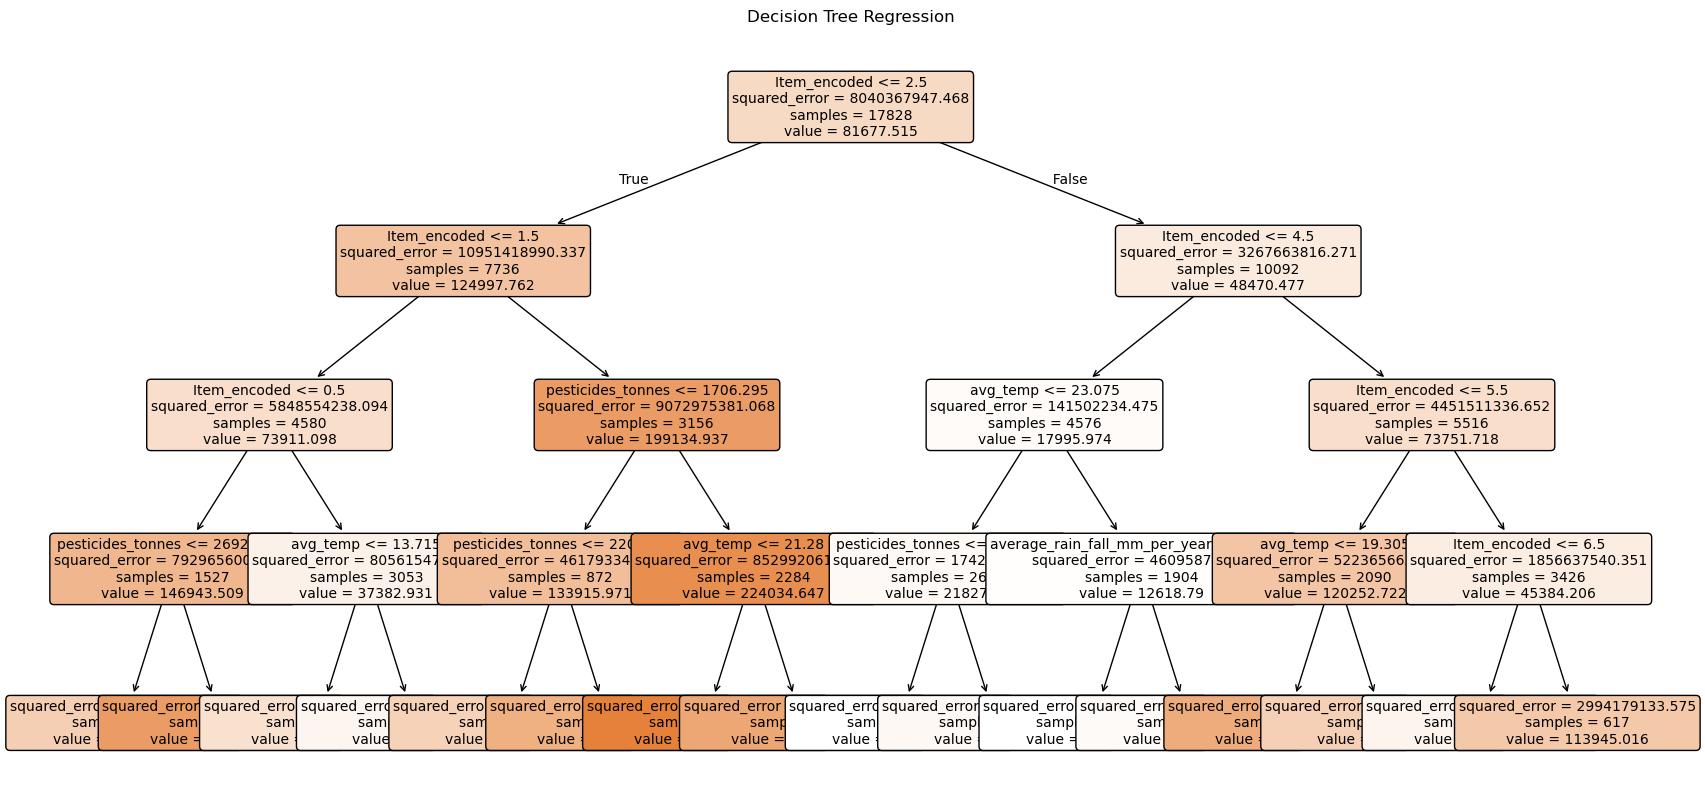

In [86]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

dt_model = DecisionTreeRegressor(max_depth=4, random_state=42) 
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree - Mean Squared Error:", mse_dt)
print("Decision Tree - R² Score:", r2_dt)

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regression")
plt.show()

In [87]:
import pickle
X = df.drop(columns=["hg/ha_yield","Area","Item"])
y = df["hg/ha_yield"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

with open("trained_model.sav", "wb") as f:
    pickle.dump((rf_model, scaler), f)


with open("trained_model.sav", "rb") as f:
    model, scaler = pickle.load(f)

